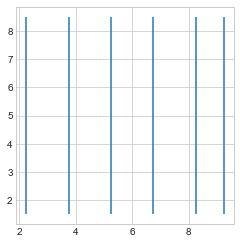

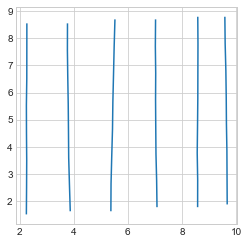

In [6]:
from classes import *
        
field = [[0,0],[0,10],[10,10],[10,0]]
Sim = Simulator(field, use_drift=True, easting_drift_const = .01, northing_drift_const = .01)

Sim.output_tracks()

In [8]:
import pandas as pd

goal_file = "Output_Tracks.csv"

df = pd.read_csv("Output_Tracks.csv")

df.columns
std = [df['True_N_std'].to_list(),df['True_N_std'].to_list()]
tru_N = df['True_N_std'].to_list()
tru_E = df['True_E_std'].to_list()
rename_keys = ["Unnamed: 0", "Real_E", "Real_N", "Real_E_std", "Real_N_std"]

ED = ErrorDetector(df, tru_E, tru_N, rename_keys = rename_keys, true_std = std, is_static=False)

ED.generate_error_dataframe()
ED.drift_df.to_csv("test_analysis_drift.csv")
ED.jump_df.to_csv("test_analysis_jump.csv")
ED.errors_df.to_csv("test_analysis_errors.csv")

Epochs Processed: 48: 100%|███████████████████████████████████████████████████████████| 48/48 [00:00<00:00, 860.59it/s]


<AxesSubplot:>

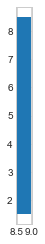

In [5]:
import geopandas as gpd
import numpy as np

df1 = Sim.T_gdf_poly
df2 = Sim.R_gdf_poly
df3 = Sim.inner_gdf
df4 = Sim.outer_gdf

#single_pass
#zero_pass
#double_pass

#zero_pass
zero_pass = gpd.overlay(df1,df2, how='difference')

#single pass
single_pass = gpd.overlay(df1,df2, how="intersection")

#double pass because of remainder filling --> true
double_pass_remainder = gpd.overlay(df1,df3, how="difference")

#double pass because of remainder filling --> real
double_pass_remainder


C:\Users\Jan Erik Naess\Anaconda3\envs\capstone\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<AxesSubplot:>

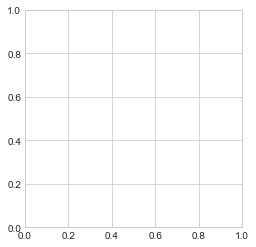

In [4]:
#https://medium.com/@achm.firmansyah/an-approach-for-checking-overlaps-and-gaps-in-polygons-using-geopandas-ebd6606e7f70
data_temp = df1

data_overlaps=gpd.GeoDataFrame()

for index, row in data_temp.iterrows():
    data_temp1=data_temp.loc[data_temp.id!=row.id,]
    
    # check if intersection occured
    overlaps=data_temp1[data_temp1.geometry.overlaps(row.geometry)]['id'].tolist()
    if len(overlaps)>0:
        temp_list=[]
        # compare the area with threshold
        for y in overlaps:
            temp_area=gpd.overlay(data_temp.loc[data_temp.id==y,],data_temp.loc[data_temp.id==row.id,],how='intersection')
            temp_area=temp_area.loc[temp_area.geometry.area>=9e-9]
            if temp_area.shape[0]>0:
                data_overlaps=gpd.GeoDataFrame(pd.concat([temp_area,data_overlaps],ignore_index=True))
# get unique of list id
#data_overlaps['sorted']=data_overlaps.apply(lambda y: sorted([y['id_1'],y['id_2']]),axis=1)
#data_overlaps['sorted']=data_overlaps.sorted.apply(lambda y: ''.join(y))
#data_overlaps=data_overlaps.drop_duplicates('sorted')
#data_overlaps=data_overlaps.reset_index()[['id_1','id_2','geometry']]
data_overlaps.plot()

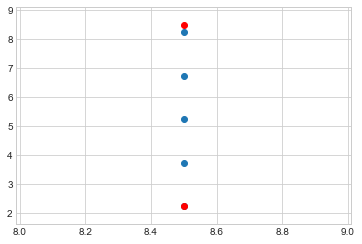

In [2]:
Sim.upper.plot()

In [3]:
Sim.upper.segments

[[8.5, 2.25], [8.5, 3.75], [8.5, 5.25], [8.5, 6.75], [8.5, 8.25]]

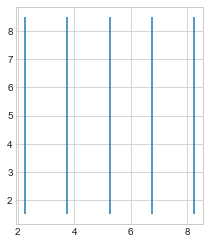

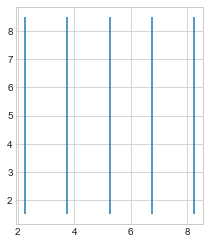

In [4]:
Sim.analyze()

In [2]:
Sim.T_gdf_pt

,myid,myorder,lat,long,geometry
0,1.0,1.0,1.5,2.25,POINT (2.25000 1.50000)
1,1.0,2.0,2.5,2.25,POINT (2.25000 2.50000)
2,1.0,3.0,3.5,2.25,POINT (2.25000 3.50000)
3,1.0,4.0,4.5,2.25,POINT (2.25000 4.50000)
4,1.0,5.0,5.5,2.25,POINT (2.25000 5.50000)
5,1.0,6.0,6.5,2.25,POINT (2.25000 6.50000)
6,1.0,7.0,7.5,2.25,POINT (2.25000 7.50000)
7,1.0,8.0,8.5,2.25,POINT (2.25000 8.50000)
8,2.0,1.0,8.5,3.75,POINT (3.75000 8.50000)
9,2.0,2.0,7.5,3.75,POINT (3.75000 7.50000)


In [3]:
Sim.R_gdf_pt

,myid,myorder,lat,long,geometry
0,1.0,1.0,1.500000,2.250000,POINT (2.25000 1.50000)
1,1.0,2.0,2.500051,2.249990,POINT (2.24999 2.50005)
2,1.0,3.0,3.500146,2.249844,POINT (2.24984 3.50015)
3,1.0,4.0,4.500198,2.249790,POINT (2.24979 4.50020)
4,1.0,5.0,5.500125,2.249803,POINT (2.24980 5.50012)
5,1.0,6.0,6.500178,2.249817,POINT (2.24982 6.50018)
6,1.0,7.0,7.500116,2.249820,POINT (2.24982 7.50012)
7,1.0,8.0,8.499921,2.249891,POINT (2.24989 8.49992)
8,2.0,1.0,8.499921,3.749891,POINT (3.74989 8.49992)
9,2.0,2.0,7.499827,3.749754,POINT (3.74975 7.49983)


In [ ]:
Sim.inner.plot()

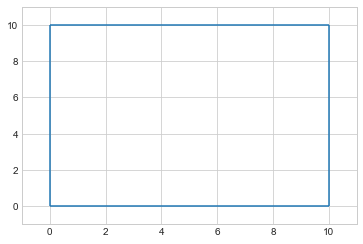

In [5]:
Sim.outer.plot()